<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 


## Objective
The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

In [1]:
from google.colab import files
files.upload()

Saving sample_4E0BhPN.csv to sample_4E0BhPN.csv
Saving test_6QvDdzb.csv to test_6QvDdzb.csv
Saving train_E1GspfA.csv to train_E1GspfA.csv


{'sample_4E0BhPN.csv': b'date,hour,demand\n2021-03-01,0,0\n2021-03-01,1,0\n2021-03-01,2,0\n2021-03-01,3,0\n2021-03-01,5,0\n2021-03-01,6,0\n2021-03-01,7,0\n2021-03-01,8,0\n2021-03-01,9,0\n2021-03-01,10,0\n2021-03-01,11,0\n2021-03-01,12,0\n2021-03-01,13,0\n2021-03-01,14,0\n2021-03-01,15,0\n2021-03-01,16,0\n2021-03-01,17,0\n2021-03-01,18,0\n2021-03-01,19,0\n2021-03-01,20,0\n2021-03-01,21,0\n2021-03-01,22,0\n2021-03-01,23,0\n2021-03-02,0,0\n2021-03-02,1,0\n2021-03-02,2,0\n2021-03-02,4,0\n2021-03-02,6,0\n2021-03-02,7,0\n2021-03-02,8,0\n2021-03-02,9,0\n2021-03-02,10,0\n2021-03-02,11,0\n2021-03-02,12,0\n2021-03-02,13,0\n2021-03-02,14,0\n2021-03-02,15,0\n2021-03-02,16,0\n2021-03-02,17,0\n2021-03-02,18,0\n2021-03-02,19,0\n2021-03-02,20,0\n2021-03-02,21,0\n2021-03-02,22,0\n2021-03-02,23,0\n2021-03-03,0,0\n2021-03-03,2,0\n2021-03-03,3,0\n2021-03-03,4,0\n2021-03-03,5,0\n2021-03-03,6,0\n2021-03-03,7,0\n2021-03-03,8,0\n2021-03-03,9,0\n2021-03-03,10,0\n2021-03-03,11,0\n2021-03-03,12,0\n2021-03-03,13,

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
train = pd.read_csv("/content/train_E1GspfA.csv")
test = pd.read_csv("/content/test_6QvDdzb.csv")

In [5]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [6]:
train.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


## Summary Statistics 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


##Check for missing values

In [9]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

##Visualize the hourly demand

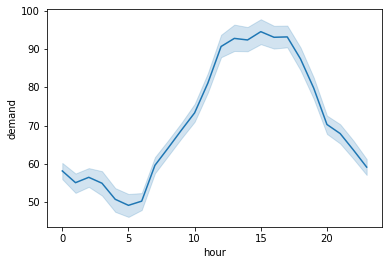

In [7]:
sns.lineplot(x='hour',y='demand',data=train)

In [12]:
train['date'] = pd.to_datetime(train['date'])
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


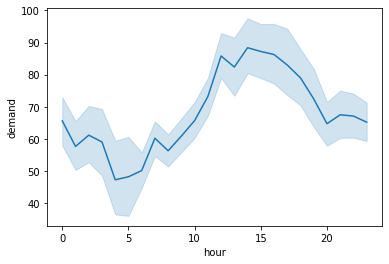

In [24]:
sns.lineplot(x='hour',y='demand',data=train[train['date'].dt.year == 2018])

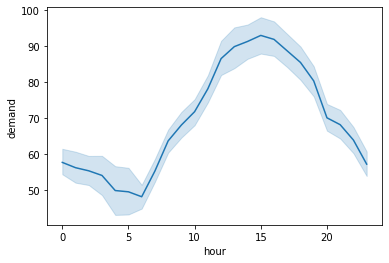

In [25]:
sns.lineplot(x='hour',y='demand',data=train[train['date'].dt.year == 2019])

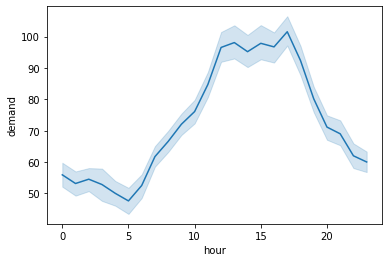

In [26]:
sns.lineplot(x='hour',y='demand',data=train[train['date'].dt.year == 2020])

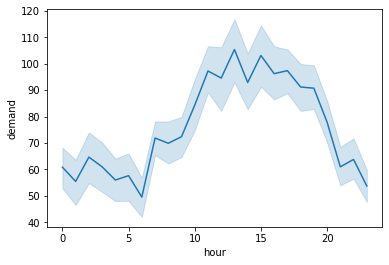

In [27]:
sns.lineplot(x='hour',y='demand',data=train[train['date'].dt.year == 2021])

In [13]:
t = train.copy()

In [14]:
t = t.set_index('date')

In [28]:
t.head()

,hour,demand
date,,
2018-08-18,9,91
2018-08-18,10,21
2018-08-18,13,23
2018-08-18,14,104
2018-08-18,15,81


<Figure size 1000x800 with 0 Axes>

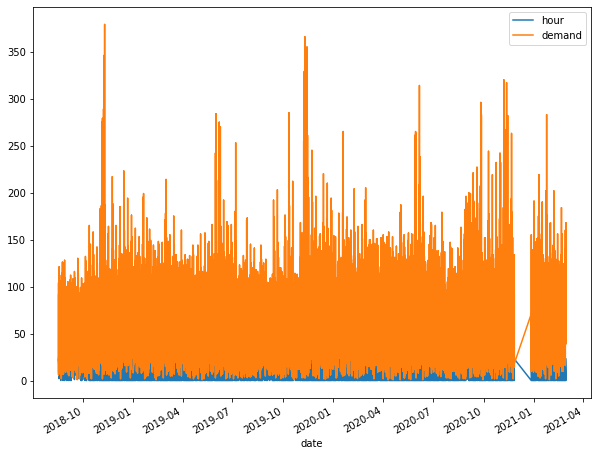

In [30]:
plt.figure(dpi=100)
t.plot()

## Using FBprophet to predict the hourly Demand

In [29]:
from datetime import datetime
from fbprophet import Prophet

#
import matplotlib  as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import os
#
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

##Rename columns as per FBprophet

In [34]:
fb_train = train.rename(columns={'date':'ds','demand':'y'})
fb_train.head()

,ds,hour,y
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [36]:
fb_train['month'] = fb_train['ds'].dt.month
fb_train.head()

,ds,hour,y,month
0,2018-08-18,9,91,8
1,2018-08-18,10,21,8
2,2018-08-18,13,23,8
3,2018-08-18,14,104,8
4,2018-08-18,15,81,8


In [37]:
fig = px.line(fb_train,x='ds',y='y',hover_data=['hour','month'],title='Energy Demand DashBoard')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=list([
                      dict(count=1,label="1y",step="year",stepmode="backward"),
                      dict(count=1,label="3y",step="year",stepmode="backward"),
                      dict(count=1,label="5y",step="year",stepmode="backward"),
                      dict(step="all")
        ])
    )

)

In [38]:
fb_train[['month','hour']].groupby('month').agg({'hour':('min','max','mean')})

hour               
       min max       mean
month                    
1        0  23  12.468670
2        0  23  12.416758
3        0  23  12.337296
4        0  23  12.472973
5        0  23  12.478425
6        0  23  12.402810
7        0  23  12.770181
8        0  23  12.949502
9        0  23  13.227074
10       0  23  12.847608
11       0  23  12.402831
12       0  23  12.601148

##Corelation between demand and hour of the day

In [39]:
fb_train[['y','hour']].corr()

,y,hour
y,1.000000,0.161498
hour,0.161498,1.000000


In [41]:
fb_train['ds'].min(),fb_train['ds'].max()

(Timestamp('2018-08-18 00:00:00'), Timestamp('2021-02-28 00:00:00'))

#Train Test Split

In [42]:
train_df = fb_train[(fb_train['ds']>='2018-08-18') & (fb_train['ds'] <= '2020-12-31')]
test_df  = fb_train[fb_train['ds'] > '2020-12-31']

In [43]:
train_df.shape,test_df.shape

((16942, 4), (1305, 4))

In [44]:
m = Prophet(interval_width=0.95)

In [47]:
m.add_regressor('hour',standardize=False)
m.add_regressor('month',standardize=False,mode='multiplicative')

In [48]:
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = m.make_future_dataframe(periods=1305, freq='h')

In [50]:
future

,ds
0,2018-08-18 00:00:00
1,2018-08-19 00:00:00
2,2018-08-20 00:00:00
3,2018-08-21 00:00:00
4,2018-08-22 00:00:00
...,...
2136,2021-02-23 05:00:00
2137,2021-02-23 06:00:00
2138,2021-02-23 07:00:00
2139,2021-02-23 08:00:00


In [51]:
future['hour'] = train_df['hour']
future['month'] = train_df['month']

In [52]:
future.tail()

,ds,hour,month
2136,2021-02-23 05:00:00,2,12
2137,2021-02-23 06:00:00,6,12
2138,2021-02-23 07:00:00,7,12
2139,2021-02-23 08:00:00,8,12
2140,2021-02-23 09:00:00,9,12


In [53]:
forecast = m.predict(future)

In [54]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2136,2021-02-23 05:00:00,64.711878,-17.098970,142.234829,64.265466,65.146084,-4.954546,-4.954546,-4.954546,2.293159,...,-0.013078,-0.013078,-0.013078,-6.583256,-6.583256,-6.583256,-0.664448,-0.664448,-0.664448,58.911027
2137,2021-02-23 06:00:00,64.712349,-11.134537,133.627033,64.265662,65.146947,-0.352795,-0.352795,-0.352795,6.879477,...,-0.013078,-0.013078,-0.013078,-6.604396,-6.604396,-6.604396,-0.627876,-0.627876,-0.627876,63.513242
2138,2021-02-23 07:00:00,64.712819,-14.883770,137.651257,64.265419,65.147811,0.811394,0.811394,0.811394,8.026057,...,-0.013078,-0.013078,-0.013078,-6.623352,-6.623352,-6.623352,-0.591311,-0.591311,-0.591311,64.677895
2139,2021-02-23 08:00:00,64.713290,-10.248823,142.136471,64.265026,65.148675,1.978243,1.978243,1.978243,9.172636,...,-0.013078,-0.013078,-0.013078,-6.639640,-6.639640,-6.639640,-0.554753,-0.554753,-0.554753,65.845209
2140,2021-02-23 09:00:00,64.713761,-12.806442,141.335413,64.264633,65.149539,3.148239,3.148239,3.148239,10.319216,...,-0.013078,-0.013078,-0.013078,-6.652771,-6.652771,-6.652771,-0.518206,-0.518206,-0.518206,67.015669


In [55]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
2136,2021-02-23 05:00:00,-17.098970,142.234829,58.911027
2137,2021-02-23 06:00:00,-11.134537,133.627033,63.513242
2138,2021-02-23 07:00:00,-14.883770,137.651257,64.677895
2139,2021-02-23 08:00:00,-10.248823,142.136471,65.845209
2140,2021-02-23 09:00:00,-12.806442,141.335413,67.015669


In [57]:
train_df.head()

,ds,hour,y,month
0,2018-08-18,9,91,8
1,2018-08-18,10,21,8
2,2018-08-18,13,23,8
3,2018-08-18,14,104,8
4,2018-08-18,15,81,8


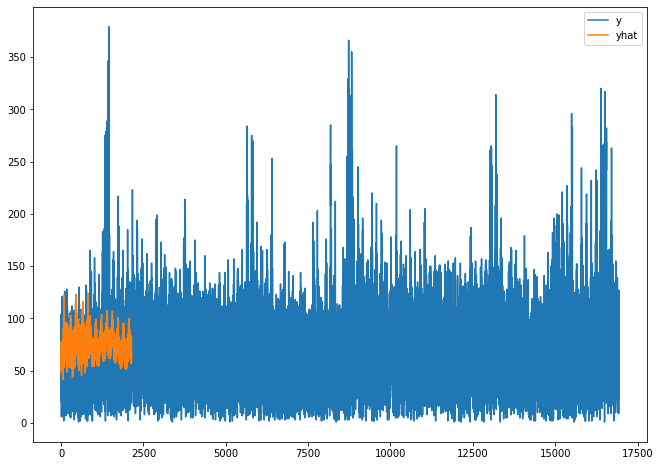

In [59]:
pd.concat([train_df['y'],forecast['yhat']],axis=1).plot(figsize=(11,8))

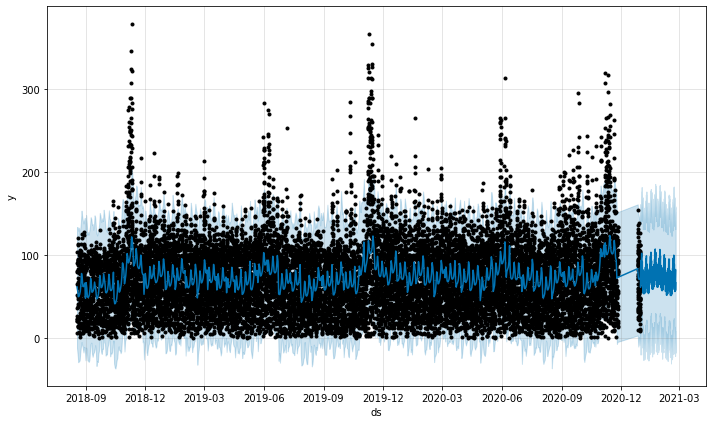

In [60]:
fig1 = m.plot(forecast)

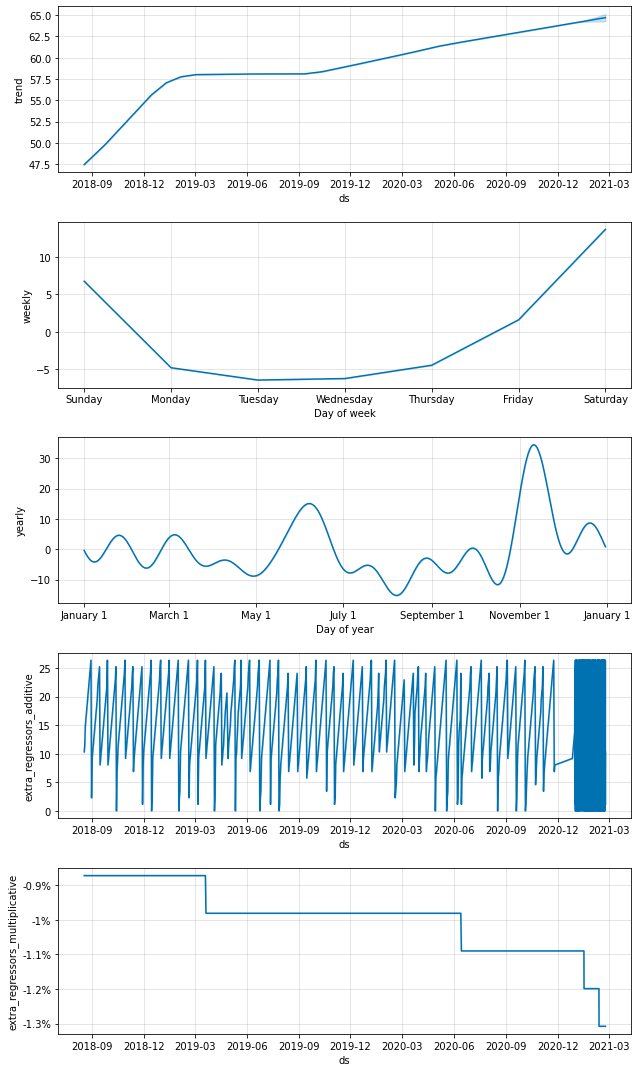

In [61]:
fig2 = m.plot_components(forecast)

In [65]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model=m,initial='500 days',horizon='365 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-02,74.944336,-6.837627,150.874192,104,2020-01-01
1,2020-01-02,66.470758,-6.268150,150.368696,116,2020-01-01
2,2020-01-02,70.707547,-5.325906,144.939094,95,2020-01-01
3,2020-01-02,69.648350,-5.675855,149.114954,41,2020-01-01
4,2020-01-02,68.589152,-8.398417,144.929169,21,2020-01-01


In [67]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(cv_results)

In [68]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,1467.544735,38.308546,30.805253,0.925761,0.330935,0.970059
1,36 days,1471.876033,38.365037,30.865802,0.930035,0.330935,0.970506
2,37 days,1472.105869,38.368032,30.905932,0.938414,0.334166,0.970506
3,38 days,1499.708861,38.726075,31.227891,0.942229,0.338702,0.970250
4,39 days,1511.807248,38.881966,31.320401,0.960371,0.334166,0.969101
...,...,...,...,...,...,...,...
296,361 days,3218.654268,56.733185,44.286169,1.094520,0.380989,0.845506
297,362 days,3207.986541,56.639090,44.094616,1.081045,0.382509,0.845506
298,363 days,3211.277715,56.668137,44.111438,1.076018,0.386127,0.845506
299,364 days,3214.190651,56.693833,44.114546,1.082409,0.389249,0.845506


In [69]:

test.shape

(7650, 2)

In [70]:
train.shape

(18247, 3)

In [71]:
final_train = train.copy()

In [72]:
final_train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [74]:
final_train  = final_train.rename(columns={'date':'ds','demand':'y'})

In [76]:
final_train.head()

,ds,hour,y
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [79]:
test['date'] = pd.to_datetime(test['date'])

In [81]:
final_train['month'] = final_train['ds'].dt.month
test['month'] = test['date'].dt.month

In [82]:
m = Prophet(interval_width=0.95)
m.add_regressor('hour',standardize=False)
m.add_regressor('month',standardize=False,mode='multiplicative')

In [83]:
m.fit(final_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
test.shape

(7650, 3)

In [106]:
future = m.make_future_dataframe(periods=10000, freq='h')

In [109]:
future

,ds,hour,month
0,2021-03-01,0,3
1,2021-03-01,1,3
2,2021-03-01,2,3
3,2021-03-01,3,3
4,2021-03-01,5,3
...,...,...,...
7645,2022-03-28,19,3
7646,2022-03-28,20,3
7647,2022-03-28,21,3
7648,2022-03-28,22,3


In [107]:
future['hour'] = final_train['hour']
future['month'] = final_train['month']

In [97]:
test.tail()

,date,hour,month
7645,2022-03-28,19,3
7646,2022-03-28,20,3
7647,2022-03-28,21,3
7648,2022-03-28,22,3
7649,2022-03-28,23,3


In [ ]:
future =

In [110]:
future = test.rename(columns={'date':'ds'})

In [111]:
forecast = m.predict(future)

In [112]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
7645,2022-03-28,-12.918360,137.813514,60.355076
7646,2022-03-28,-19.999222,133.143703,56.973551
7647,2022-03-28,1.895765,158.478177,79.517053
7648,2022-03-28,-10.030389,146.340099,68.245302
7649,2022-03-28,0.039072,153.576265,80.644228


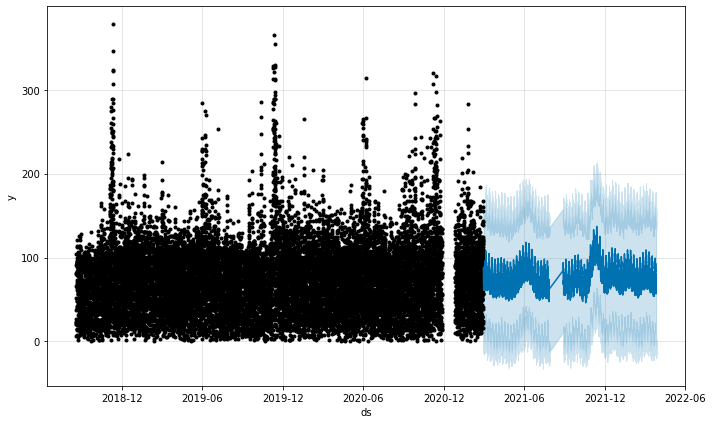

In [113]:
fig1 = m.plot(forecast)

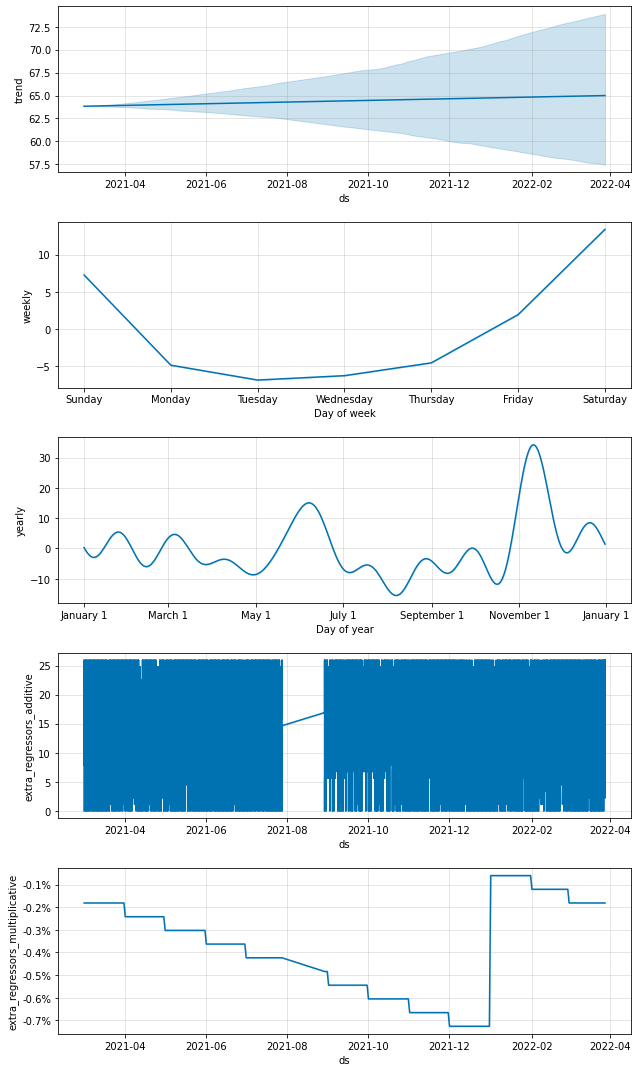

In [114]:
fig2 = m.plot_components(forecast)

In [115]:
test['demand'] = forecast['yhat']

In [116]:
test.head()

,date,hour,month,demand
0,2021-03-01,0,3,62.394529
1,2021-03-01,1,3,88.319557
2,2021-03-01,2,3,87.192382
3,2021-03-01,3,3,86.065206
4,2021-03-01,5,3,84.938031


In [117]:
sub= pd.read_csv("/content/sample_4E0BhPN.csv")

In [118]:
sub.head()

,date,hour,demand
0,2021-03-01,0,0
1,2021-03-01,1,0
2,2021-03-01,2,0
3,2021-03-01,3,0
4,2021-03-01,5,0


In [119]:
test[['date','hour','demand']].to_csv("forecast_prediction.csv",index=False)